# Querying Datalake with BlazingSQL

BlazingSQL is an open-source project.
In this Notebook, we'll go over how to Connect to Zeblok Datalake Server and register a Zeblok Datalake bucket with BlazingSQL so we can run queries on top of files that are stored in a Zeblok Datalake cluster.

In [1]:
from blazingsql import BlazingContext
bc = BlazingContext()

BlazingContext ready


### Connecting to Zeblok Datalake using BlazingSQL

##### SecretKey and Username are avaialable on Zeblok Computational Dashboard "Manage your Zeblok Accounts" Page

In [2]:
bc.s3('taxi', 
      bucket_name='datalake',
      access_key_id='<username>', 
      secret_key='<secretKey>',
      endpoint_override="http://130.245.177.209:9000")

(True,
 '',
 OrderedDict([('type', 's3'),
              ('bucket_name', 'datalake'),
              ('access_key_id', 'akash'),
              ('secret_key', '5e4cc603f8e6600013f9cff2'),
              ('session_token', ''),
              ('encryption_type', <S3EncryptionType.NONE: 1>),
              ('kms_key_amazon_resource_name', ''),
              ('endpoint_override', 'http://130.245.177.209:9000'),
              ('region', '')]))

### Create & Query table from Zeblok Datalake bucket

Now that the Zeblok Datalake bucket is registered with BlazingContext, we can easily create & query tables from data stored in the bucket.

In [9]:
bc.create_table('taxi', 's3://taxi/<username>/<filePath>')

And pull DataFrames from those tables with `.sql()`;

In [10]:
bc.sql("select * from taxi")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,1,N,1,12.0,1.0,0.5,3.25,0.00,0.3,17.05,-8236962.878,66.693057,-8234835.381,66.694056
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,1,N,1,14.5,0.5,0.5,2.00,0.00,0.3,17.80,-8237825.768,66.642117,-8237020.631,66.710783
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,1,N,2,9.5,0.5,0.5,0.00,0.00,0.3,10.80,-8233561.431,66.796854,-8232278.987,66.839490
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,1,N,2,3.5,0.5,0.5,0.00,0.00,0.3,4.80,-8238653.836,66.621592,-8238123.872,66.633735
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,1,N,2,15.0,0.5,0.5,0.00,0.00,0.3,16.30,-8234433.662,66.717321,-8238107.735,66.678369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743655,1,2015-01-28 11:11:43,2015-01-28 11:29:03,1,2.60,1,N,1,12.5,0.0,0.5,1.50,0.00,0.3,14.80,-8233738.934,66.725941,-8236360.724,66.662901
743656,1,2015-01-28 11:11:43,2015-01-28 11:24:39,1,2.50,1,N,2,12.0,0.0,0.5,0.00,0.00,0.3,12.80,-8236326.753,66.619617,-8239263.633,66.604966
743657,1,2015-01-28 11:11:43,2015-01-28 11:19:05,1,0.50,1,N,1,6.0,0.0,0.5,1.70,0.00,0.3,8.50,-8237036.767,66.674845,-8236477.079,66.687925
743658,1,2015-01-28 11:11:43,2015-01-28 11:35:15,1,9.10,1,N,1,28.5,0.0,0.5,6.92,5.33,0.3,41.55,-8223703.602,66.740356,-8233243.793,66.732021


Handoff results to data viz packages like Matplotlib the same way;

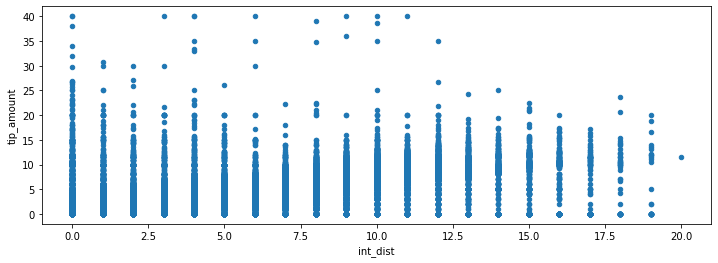

In [11]:
query = '''
        SELECT 
            cast(trip_distance as int) int_dist, tip_amount 
        FROM 
            taxi
            WHERE
                trip_distance <= 20
                AND tip_amount BETWEEN 0 AND 40
                '''
bc.sql(query).to_pandas().plot(kind='scatter', x='int_dist', y='tip_amount', figsize=(12, 4))

Train machine learning models with suites like cuML;

In [12]:
from cuml import LinearRegression
lr = LinearRegression()

lr.fit(X=bc.sql('SELECT tip_amount, passenger_count FROM taxi'),
       y=bc.sql('SELECT trip_distance FROM taxi')['trip_distance'])

import cudf
df = cudf.DataFrame()

df['tip_amount'] = [0.00, 5.00, 20.00]
df['passenger_count'] = [1.0, 1.0, 1.0]

lr.predict(df)

0     1.715281
1     4.445757
2    12.637187
dtype: float64